In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from tensorflow import keras
from keras.models import Sequential
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.layers import Flatten, Dense, Dropout, Activation
from google.colab import drive
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import load_img,img_to_array


In [2]:
#conect drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
#Create data
drive.mount('/content/drive',force_remount=True)

train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)
train=train_datagen.flow_from_directory('/content/drive/MyDrive/CNN_Money/Train',
                                               target_size=(128,128),
                                               batch_size=32,
                                               class_mode ='categorical')
test=train_datagen.flow_from_directory('/content/drive/MyDrive/CNN_Money/Test',
                                               target_size=(128,128),
                                               batch_size=32,
                                               class_mode ='categorical')

Mounted at /content/drive
Found 55 images belonging to 11 classes.
Found 11 images belonging to 11 classes.


In [4]:
#Create model
model=Sequential()

model.add(Conv2D(128,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same',input_shape=(128,128,3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(64,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(32,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D((2,2)))

model.add(Flatten())
model.add(Dense(64,activation='relu',kernel_initializer = 'he_uniform'))
model.add(Dense(11,activation='Softmax'))


model.compile(optimizer = 'adam', loss ='categorical_crossentropy',metrics = ['accuracy'])
callbacks=[EarlyStopping(monitor='val_loss',patience=100)]
history=model.fit(train,
                  steps_per_epoch=len(train),
                  batch_size = 32,
                  epochs=50,
                  validation_data=test,
                  validation_steps=len(test),
                  callbacks=callbacks,
                  verbose = 1)

Epoch 1/50
2/2 [==============================] - 15s 11s/step - loss: 2.9731 - accuracy: 0.1636 - val_loss: 2.6953 - val_accuracy: 0.0909
Epoch 2/50
2/2 [==============================] - 5s 2s/step - loss: 2.5756 - accuracy: 0.0909 - val_loss: 2.4857 - val_accuracy: 0.1818
Epoch 3/50
2/2 [==============================] - 5s 2s/step - loss: 2.4802 - accuracy: 0.0727 - val_loss: 2.4259 - val_accuracy: 0.1818
Epoch 4/50
2/2 [==============================] - 5s 2s/step - loss: 2.4030 - accuracy: 0.0545 - val_loss: 2.4277 - val_accuracy: 0.0909
Epoch 5/50
2/2 [==============================] - 5s 2s/step - loss: 2.3713 - accuracy: 0.1636 - val_loss: 2.4119 - val_accuracy: 0.1818
Epoch 6/50
2/2 [==============================] - 5s 2s/step - loss: 2.3603 - accuracy: 0.1091 - val_loss: 2.5126 - val_accuracy: 0.0909
Epoch 7/50
2/2 [==============================] - 5s 2s/step - loss: 2.3432 - accuracy: 0.0909 - val_loss: 2.4221 - val_accuracy: 0.0000e+00
Epoch 8/50
2/2 [===================

In [5]:
model.save('CNN_10MoneyVN.h5')

In [7]:
label = ['100k','10k','1k','200','200k','20k','2k','500','500k','50k','5k']

Test loss=  1.2767133712768555
Test accuracy=  0.7272727489471436


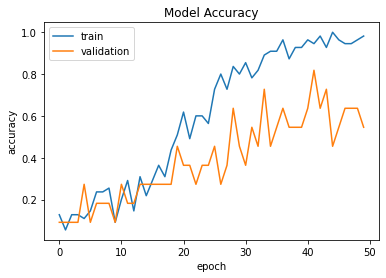

In [8]:

score = model.evaluate(test,verbose=0)
print('Test loss= ',score[0])
print('Test accuracy= ',score[1])
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','validation'],loc='upper left')

500k


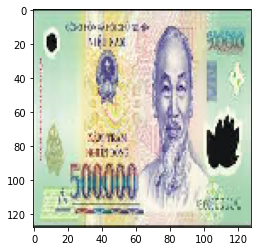

In [11]:

img = load_img('/content/500k.jpg', target_size = (128,128))
plt.imshow(img)
img = img_to_array(img)
img = img.reshape(1,128,128,3) 
img = img.astype('float32')
img = img/255
print(label[np.argmax(model.predict(img))])